## Importing Libraries

In [1]:
# importing basic array & dataframe manipulation
import pandas as pd
import numpy as np

# importing visualization library & setting visualizations parameters
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


# setting figure parameters
sns.set_theme(style = 'darkgrid', palette = 'inferno')
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 150

# warnings library to ignore display of warnings
import warnings
warnings.filterwarnings('ignore')

# Set the display option to show the full content of a column
pd.set_option('display.max_colwidth', None)

# importing nltk (Natural Language toolkit) for text preprocessing
import nltk

from nltk.stem import WordNetLemmatizer

# importing stopwords for stop word removal
from nltk.corpus import stopwords

# importing regular expression
import re

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NEEL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NEEL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NEEL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Basic Data Exploration

In [2]:
# importing the dataset

data = pd.read_csv('https://raw.githubusercontent.com/PariketPasari/Sentimment_LLM/main/financial_sentiment_data.csv')
data.head()

,Sentence,Sentiment
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral


In [3]:
# checking for number of rows, number of columns, columnwise datatype, presence of missing value

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [4]:
# getting statistical info for the textual data
data.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,"Managing Director 's comments : `` Net sales for the first quarter were notably lower than a year before , especially in Finland , Russia and the Baltic countries .",neutral
freq,2,3130


In [5]:
# checking for count of duplicate values
data.duplicated().sum()

6

In [6]:
# checking for actual values that showed up as duplicate
data[data.duplicated()]

,Sentence,Sentiment
1825,"Proha Plc ( Euronext :7327 ) announced today ( 19 May ) that its fully-owned subsidiary , Safran Software Solutions AS , has agreed to sell its 49 % share of Safran North America LLC to a SNA Holding AS , an investment group based in Norway .",neutral
1859,"SSH Communications Security Corporation is headquartered in Helsinki , Finland .",neutral
2672,Ahlstrom 's share is quoted on the NASDAQ OMX Helsinki .,neutral
3272,"The company serves customers in various industries , including process and resources , industrial machinery , architecture , building , construction , electrical , transportation , electronics , chemical , petrochemical , energy , and information technology , as well as catering and households .",neutral
3986,The issuer is solely responsible for the content of this announcement .,neutral
5342,"The report profiles 614 companies including many key and niche players worldwide such as Black & Decker Corporation , Fiskars Corporation , Fiskars Brands , Inc. , Husqvarna Outdoor Products Inc. , K+S Group , Ryobi Technologies , Inc. , The Scotts Miracle-Gro Company , and Van Group , Inc. .",neutral


In [7]:
#checking for any missing entries

data.isna().sum()

Sentence     0
Sentiment    0
dtype: int64

### Sentiment Column Analysis

In [8]:
# checking for count of each sentiment in dataset
data['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [9]:
sentiment_counts = data['Sentiment'].value_counts().sort_index()

sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_colors = ['#ff0000', 'cyan', '#38ff00']

fig = go.Figure(data=[go.Pie(labels=sentiment_counts.index,
                             values=sentiment_counts.values,
                             textinfo='percent+value+label',
                             marker_colors=sentiment_colors,
                             textposition='auto',
                             hole=.2)])

fig.update_layout(
    title_text='Sentiment Distribution',
    template='plotly_white',
    xaxis=dict(
        title='Sources',
    ),
    yaxis=dict(
        title='Number of Posts in Twitter',
    )
)
fig.update_traces(marker_line_color='black',
        marker_line_width=2,
        opacity=0.8)

fig.show()


In [10]:
    sentiment_counts = data['Sentiment'].value_counts().sort_values(ascending=False)[:10]

    fig = px.bar(x=sentiment_counts.index,
                y=sentiment_counts.values,
                color=sentiment_counts.values,
                text=sentiment_counts.values,
                color_continuous_scale='reds'
                )

    fig.update_layout(
        title_text='Sentiment Distribution',
        template='plotly_white',
        xaxis=dict(
            title='Sentiment',
        ),
        yaxis=dict(
            title='Number of Posts',
        )
    )

    fig.update_traces(marker_line_color='black',
                    marker_line_width=2,
                    opacity=1.0)

    fig.show()

***Inference***
* **Sentiment column is imbalanced**
neutral has total of 3130 data points which is 53.6 % of total data, which might dominate the model
* positive has total of 1852 points which is 31.7 % of total data
* negative has total of 860 points which is 14.7 % of total data





### Sentence column Analysis

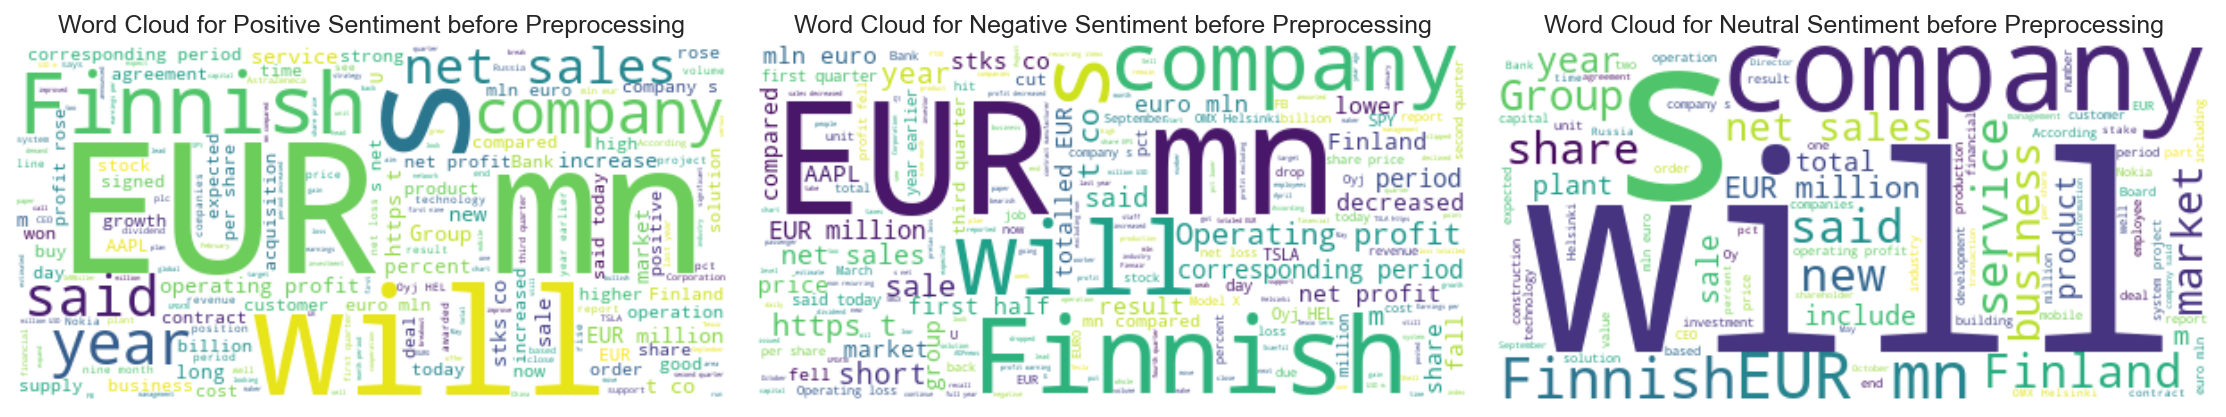

In [11]:
# Create word clouds for each sentiment

sentiments = data['Sentiment'].unique()

plt.figure(figsize=(15, 8))

for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(2, 3, i)
    sentiment_text = ' '.join(data[data['Sentiment'] == sentiment]['Sentence'])
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(sentiment_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment before Preprocessing')
    plt.axis('off')

plt.tight_layout()
plt.show()

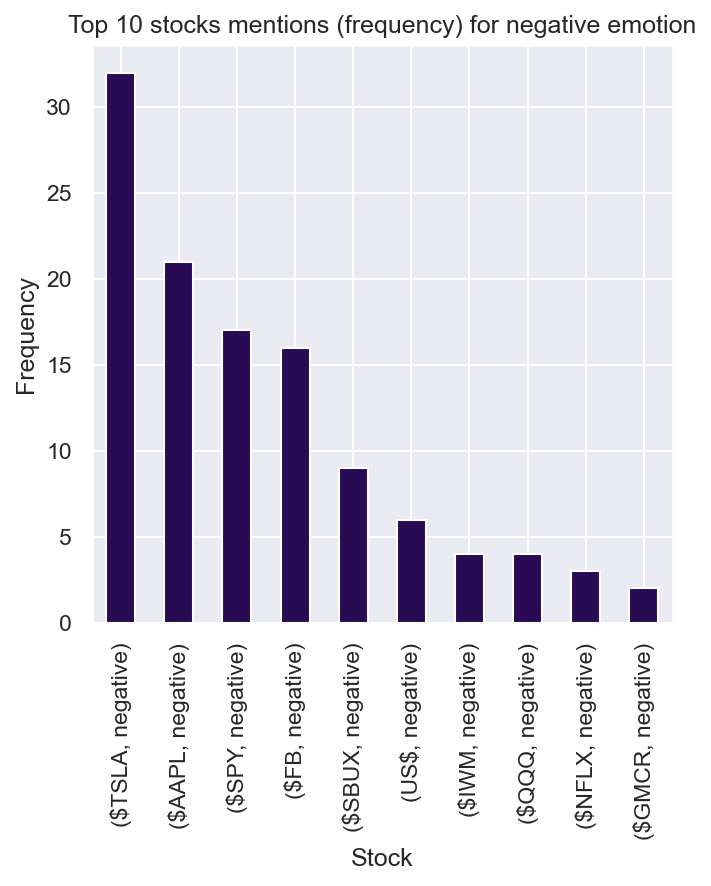

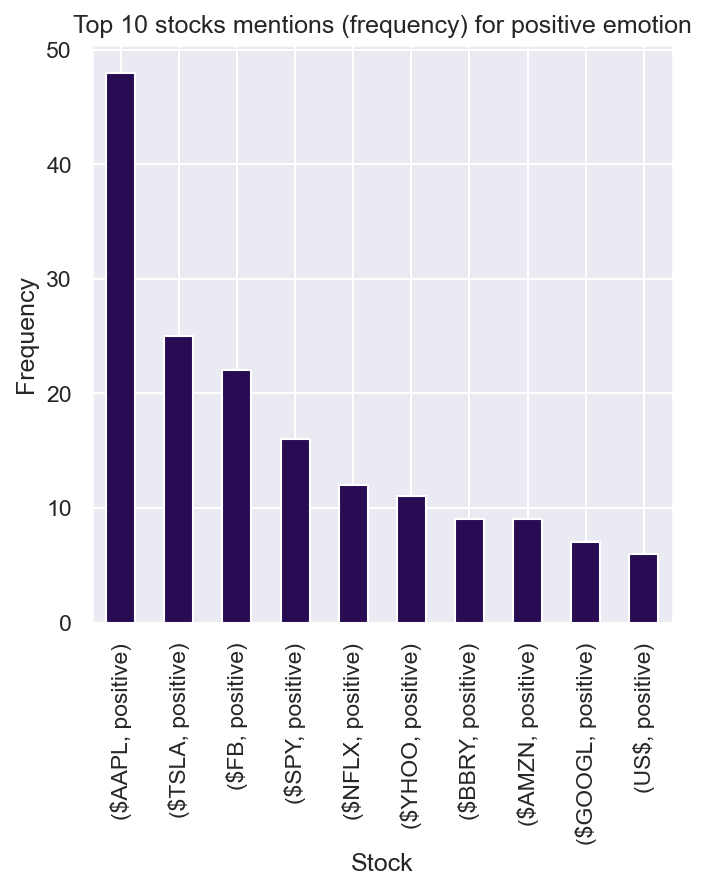

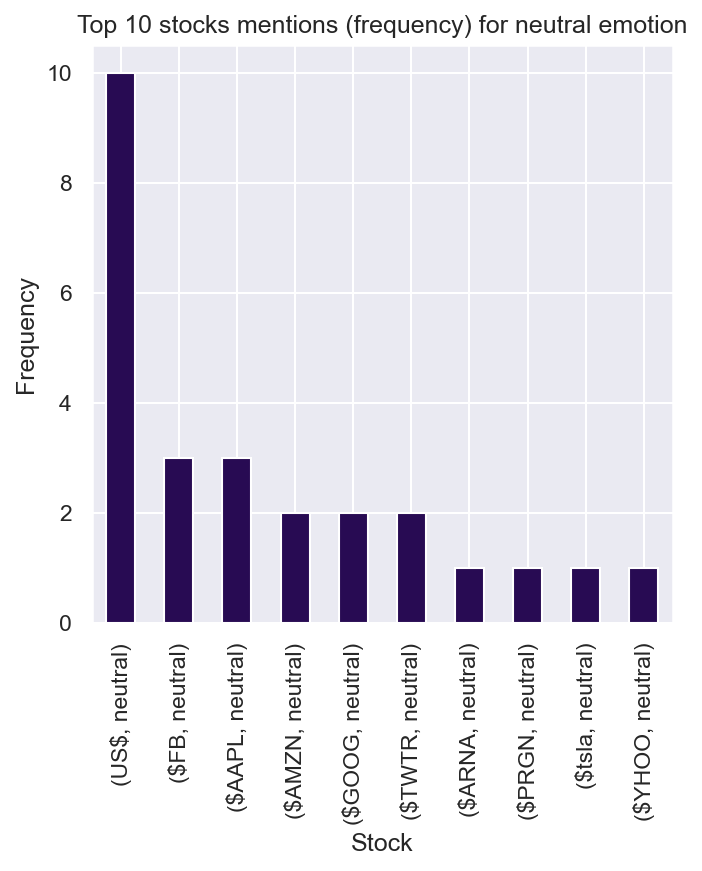

In [12]:
stocks_df = pd.DataFrame()

stocks = []
sentiment = []

for i in range(len(data)):
    tweet = data['Sentence'][i]

    for wrd in tweet.split(' '):
        if '$' in wrd:
            if wrd.replace('$','').isalnum() and not wrd.replace('$','').isnumeric():
                stocks.append(wrd)
                sentiment.append(data['Sentiment'][i])

stocks_df['Stock'] = stocks
stocks_df['Sentiment'] = sentiment

stocks_df

for label in stocks_df['Sentiment'].unique():
    stocks_df[stocks_df['Sentiment']==label].value_counts().nlargest(10).plot.bar()
    plt.title(f'Top 10 stocks mentions (frequency) for {label} emotion')
    plt.xlabel('Stock')
    plt.ylabel('Frequency')
    plt.show()

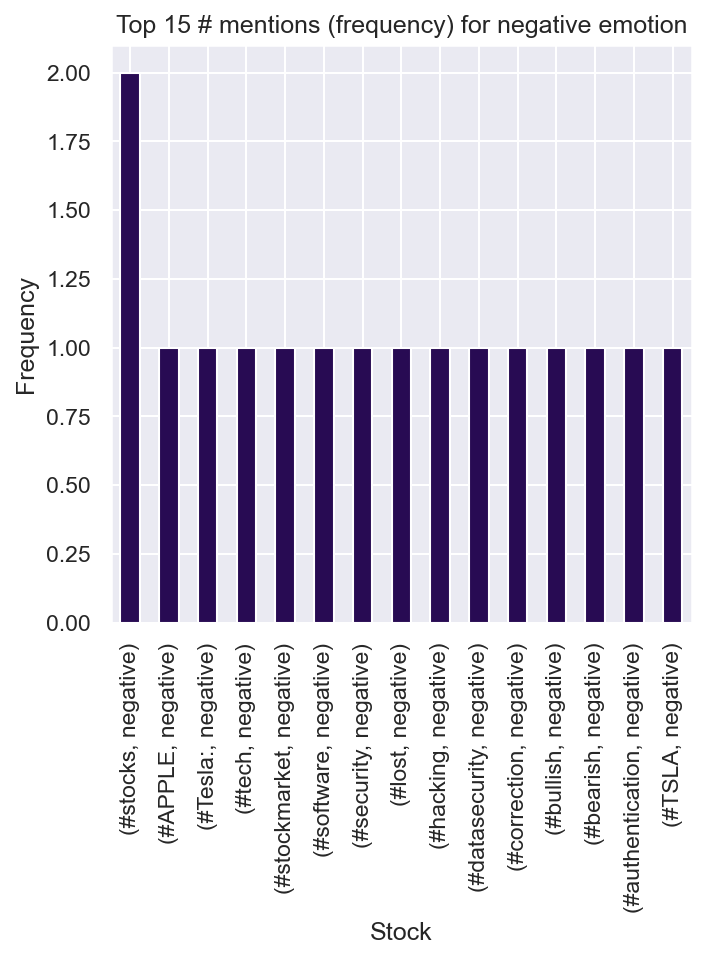

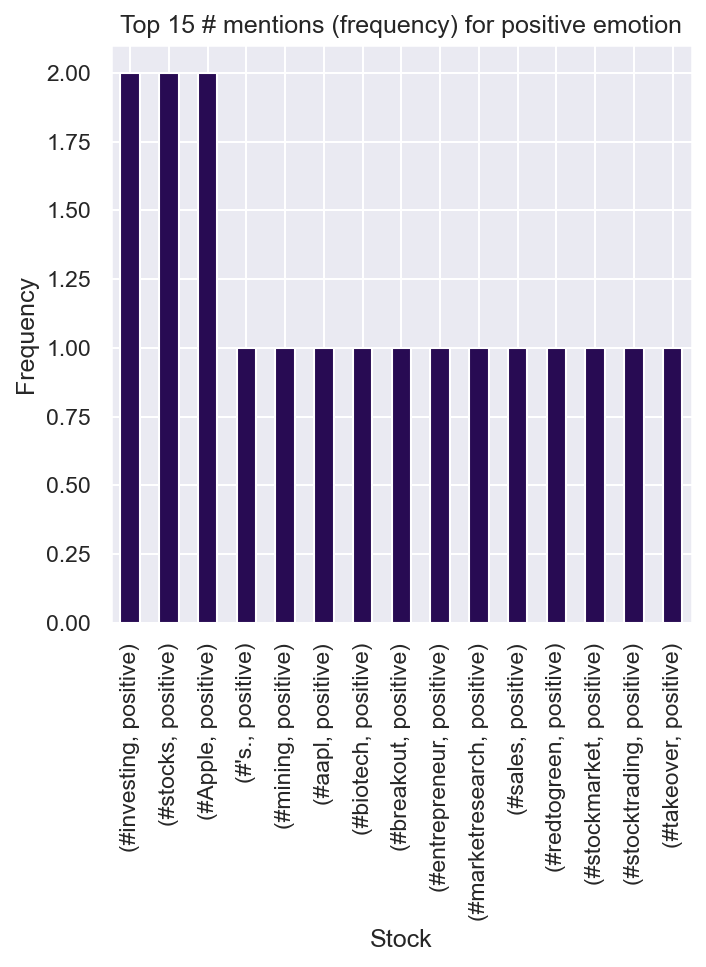

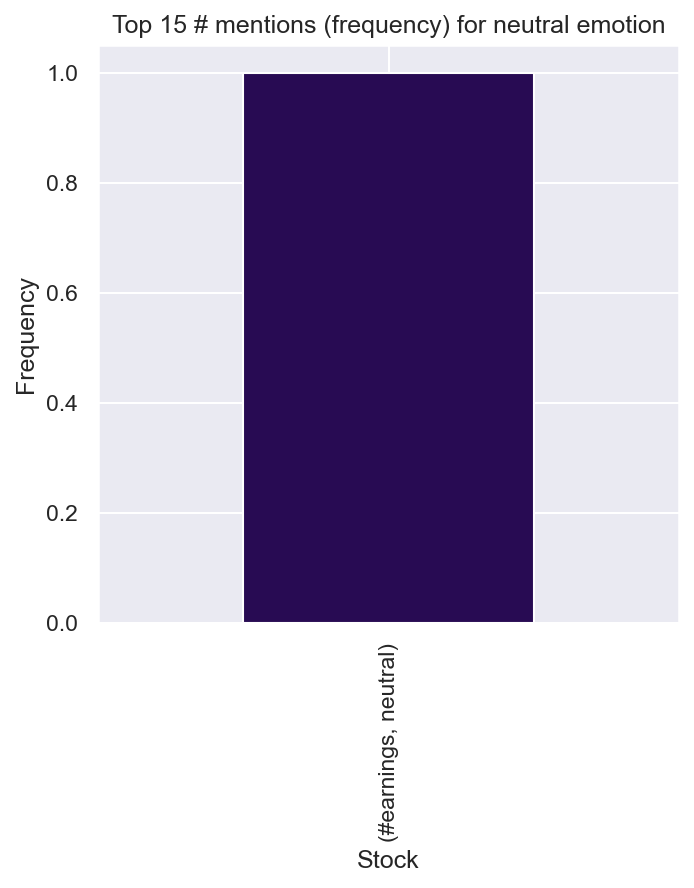

In [13]:
tags_df = pd.DataFrame()

tag = []
sentiment = []

for i in range(len(data)):
    tweet = data['Sentence'][i]

    for wrd in tweet.split(' '):
        if '#' in wrd:
                tag.append(wrd)
                sentiment.append(data['Sentiment'][i])

tags_df['Hashtag'] = tag
tags_df['Sentiment'] = sentiment

tags_df

for label in tags_df['Sentiment'].unique():
    tags_df[tags_df['Sentiment']==label].value_counts().nlargest(15).plot.bar()
    plt.title(f'Top 15 # mentions (frequency) for {label} emotion')
    plt.xlabel('Stock')
    plt.ylabel('Frequency')
    plt.show()

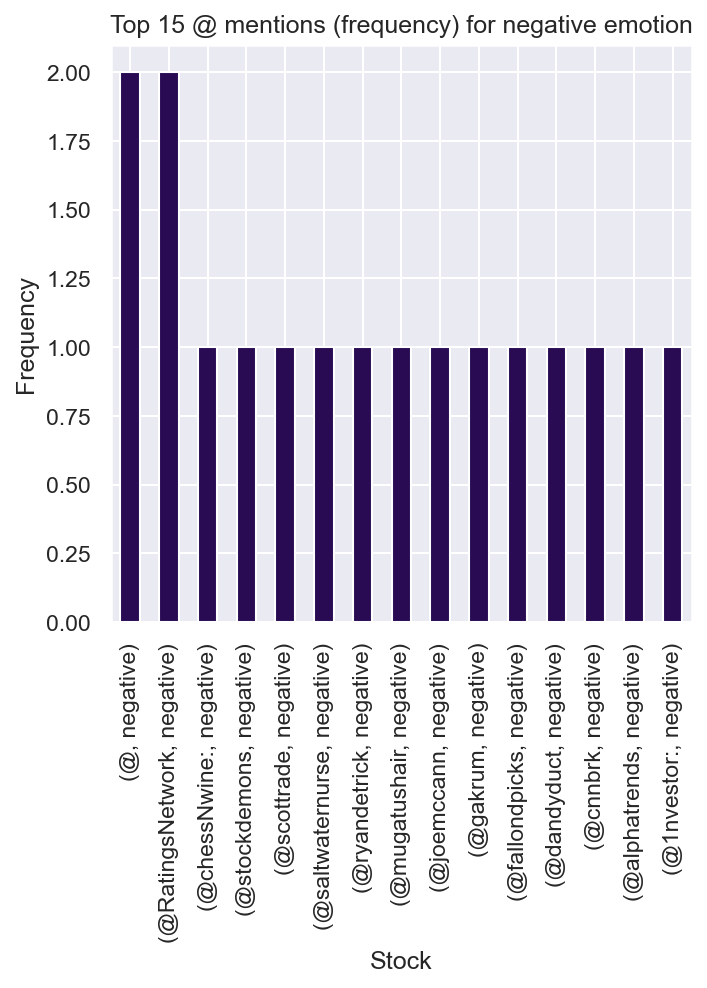

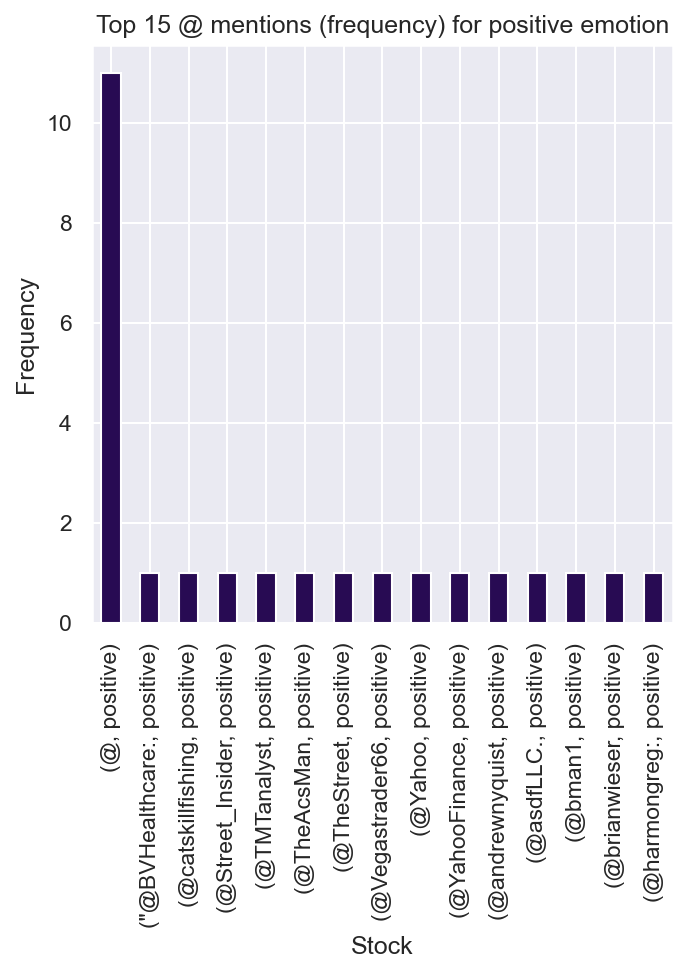

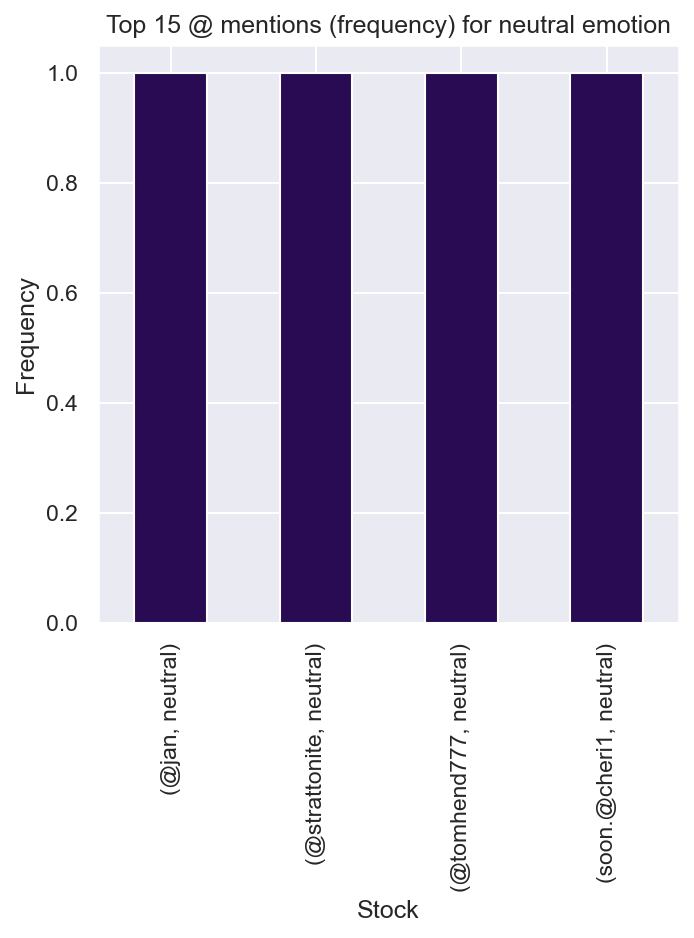

In [14]:
mention_df = pd.DataFrame()

mention = []
sentiment = []

for i in range(len(data)):
    tweet = data['Sentence'][i]

    for wrd in tweet.split(' '):
        if '@' in wrd:
                mention.append(wrd)
                sentiment.append(data['Sentiment'][i])

mention_df['Hashtag'] = mention
mention_df['Sentiment'] = sentiment



for label in mention_df['Sentiment'].unique():
    mention_df[mention_df['Sentiment']==label].value_counts().nlargest(15).plot.bar()
    plt.title(f'Top 15 @ mentions (frequency) for {label} emotion')
    plt.xlabel('Stock')
    plt.ylabel('Frequency')
    plt.show()

## Data Preprocessing

- Tokenization
- Lowercasing
- Stopword Removal
- Removing Punctuation and Numbers
- Handling Special Characters
- Removing HTML Tags
- Removing URLs
- Removing Extra Spaces
- Abbriviation

In [15]:
# creating a copy of data & storing it into 'df' to try data preprocessing

df = data.copy()
df.head()

,Sentence,Sentiment
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral


In [16]:
import nltk
nltk.download('omw-1.4')
currency_abbreviations = {
    'm': 'million',
    'mn': 'million',
    'mln': 'million',
    'b': 'billion',
    'bn': 'billion',
    'eur': 'euro',
    'usd': 'us dollar',
    'jpy': 'japanese yen',
    'gbp': 'british pound',
    'inr': 'indian rupee',
    # Add more currencies as needed
}


def preprocess_text(text):

    # Initialize the lemmatizer
    wnl = WordNetLemmatizer()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Lemmatization
    tokens = [wnl.lemmatize(token) for token in tokens]

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Remove punctuation and numbers
    tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens if token.isalnum()]

    # Handle special characters
    tokens = [re.sub(r"[^a-zA-Z0-9]", ' ', token) for token in tokens]

     # Currency abbreviation handling
    for i in range(len(tokens)):
        token = tokens[i]
        # Check if the token is a currency abbreviation in the dictionary
        if token.lower() in currency_abbreviations:
            tokens[i] = currency_abbreviations[token.lower()]

    # Remove extra spaces
    text = ' '.join(tokens)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the preprocessing function to the 'sentence' column
df['cleaned_text'] = df['Sentence'].apply(preprocess_text)


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\NEEL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [17]:
df.head(10)

,Sentence,Sentiment,cleaned_text
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive,geosolutions technology leverage benefon gps solution providing location based search technology communities platform location relevant multimedia content new powerful commercial model
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative,esi low bk real possibility
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive,last quarter componenta net sale doubled eurm eurm period year earlier moved zero profit loss eurm
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral,according chamber commerce major construction company finland operating russia
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral,swedish buyout firm ha sold remaining percent stake almost eighteen month taking company public finland
5,$SPY wouldn't be surprised to see a green close,positive,spy would surprised see green close
6,Shell's $70 Billion BG Deal Meets Shareholder Skepticism,negative,shell billion bg deal meets shareholder skepticism
7,"SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER 14 , 2008 AT 2:45 PM The Company updates its full year outlook and estimates its results to remain at loss for the full year .",negative,ssh communications security corp stock exchange release october pm company update full year outlook estimate result remain loss full year
8,Kone 's net sales rose by some 14 % year-on-year in the first nine months of 2008 .,positive,kone net sale rose first nine month
9,"The Stockmann department store will have a total floor space of over 8,000 square metres and Stockmann 's investment in the project will have a price tag of about EUR 12 million .",neutral,stockmann department store total floor space square metre stockmann investment project price tag euro million


### Visualization after preprocessing

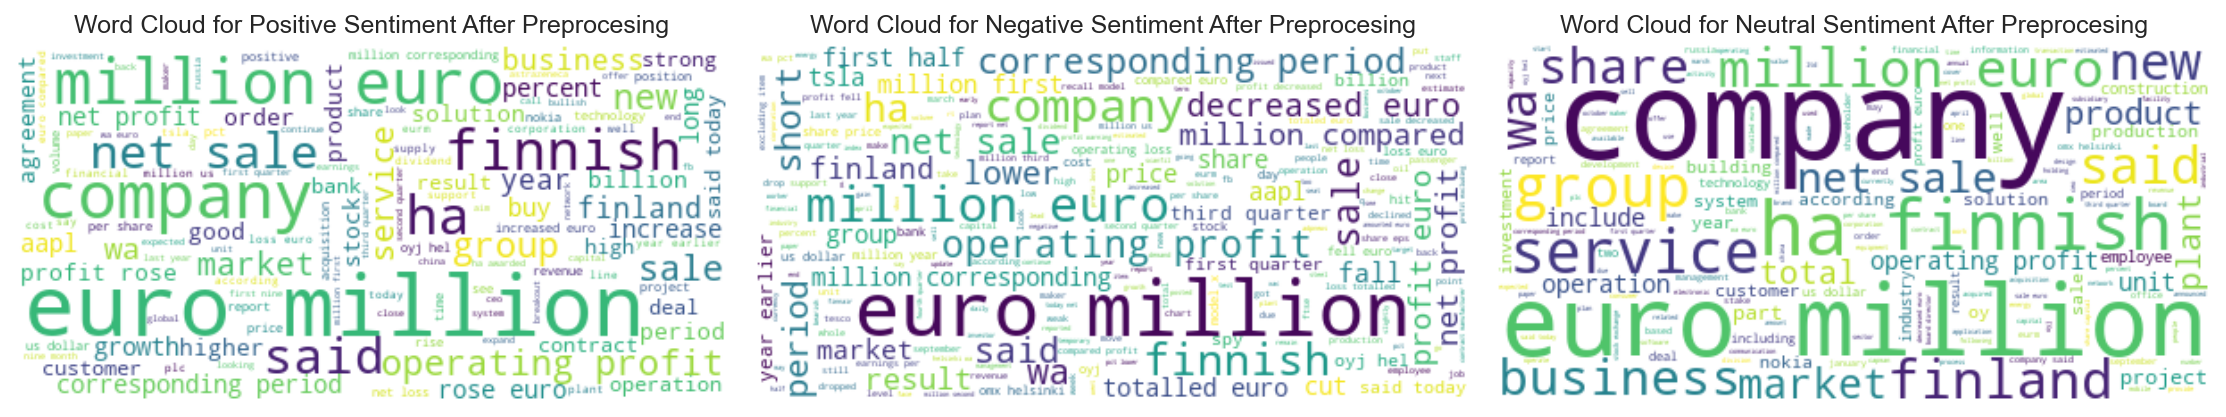

In [18]:
# Create word clouds for each sentiment after data preprocessing

sentiments = df['Sentiment'].unique()

plt.figure(figsize=(15, 15))

for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(3, 3, i)
    sentiment_text = ' '.join(df[df['Sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(sentiment_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment After Preprocesing')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [19]:
# Various function for visualization

# temporary text cleaning
def get_all_string(sentences):
    sentence = ''
    for words in sentences:
        sentence += words
    sentence = re.sub('[^A-Za-z0-9 ]+', '', sentence)
    sentence = re.sub(r'http\S+', '', sentence)
    sentence = sentence.lower()
    return sentence

def get_word(sentence):
    return nltk.RegexpTokenizer(r'\w+').tokenize(sentence)

def remove_stopword(word_tokens):
    stopword_list = stopwords.words('english')
    filtered_tokens = []

    for word in word_tokens:
        if word not in stopword_list:
            filtered_tokens.append(word)
    return filtered_tokens

def lemmatize_words(filtered_tokens):
    lemm = WordNetLemmatizer()
    cleaned_tokens = [lemm.lemmatize(word) for word in filtered_tokens]
    return cleaned_tokens

# getting frequency of words
def create_freq_df(cleaned_tokens):
    fdist = nltk.FreqDist(cleaned_tokens)
    freq_df = pd.DataFrame.from_dict(fdist, orient='index')
    freq_df.columns = ['Frequency']
    freq_df.index.name = 'Term'
    freq_df = freq_df.sort_values(by=['Frequency'], ascending=False)
    freq_df = freq_df.reset_index()
    return freq_df

# applying cleaning
def preprocess(series):
    all_string = get_all_string(series)
    words = get_word(all_string)
    filtered_tokens = remove_stopword(words)
    return filtered_tokens

#function for plotting frequnecy distribution
def plot_text_distribution(x_df, y_df, color, title, xaxis_text, yaxis_text):

    fig = px.bar(x=x_df,
                y=y_df,
                color=y_df,
                text=y_df,
                color_continuous_scale=color)

    fig.update_layout(
        title_text=title,
        template='plotly_white',
        xaxis=dict(
            title=xaxis_text,
        ),
        yaxis=dict(
            title=yaxis_text,
        )
    )

    fig.update_traces(marker_line_color='black',
                    marker_line_width=1.5,
                    opacity=0.8)

    fig.show()

In [20]:
# bar chat for most occuring words in negative sentiment

negative_words = preprocess(df.loc[df['Sentiment'] == 'negative']['cleaned_text'])
negative_words_df = create_freq_df(negative_words)
top10_negative_words = negative_words_df[:5]

plot_text_distribution(top10_negative_words['Term'], top10_negative_words['Frequency'],
                  'Reds', 'Top 5 Negative Sentiment Text Distribution', 'Text', 'Number of Texts')

In [21]:
# bar chat for most occuring words in neutral sentiment
neutral_words = preprocess(df.loc[df['Sentiment'] == 'neutral']['cleaned_text'])
neutral_words_df = create_freq_df(neutral_words)
top10_neutral_words = neutral_words_df[:5]

plot_text_distribution(top10_neutral_words['Term'], top10_neutral_words['Frequency'],
                  'blues', 'Top 5 Neutral Sentiment Text Distribution', 'Text', 'Number of Texts')


In [22]:
# bar chat for most occuring words in positive sentiment

positive_words = preprocess(df.loc[df['Sentiment'] == 'positive']['cleaned_text'])
positive_words_df = create_freq_df(positive_words)
top10_positive_words = positive_words_df[:5]

plot_text_distribution(top10_positive_words['Term'], top10_positive_words['Frequency'],
                  'greens', 'Top 5 Positive Sentiment Text Distribution', 'Text', 'Number of Texts')


In [31]:
data_cleaned = df.copy()

In [34]:
data_cleaned.drop(['Sentence'],axis=1,inplace=True)

In [35]:
data_cleaned

,Sentiment,cleaned_text
0,positive,geosolutions technology leverage benefon gps solution providing location based search technology communities platform location relevant multimedia content new powerful commercial model
1,negative,esi low bk real possibility
2,positive,last quarter componenta net sale doubled eurm eurm period year earlier moved zero profit loss eurm
3,neutral,according chamber commerce major construction company finland operating russia
4,neutral,swedish buyout firm ha sold remaining percent stake almost eighteen month taking company public finland
...,...,...
5837,negative,rising cost forced packaging producer huhtamaki axe job hampshire manufacturing plant
5838,neutral,nordic walking wa first used summer training method skier
5839,neutral,according shipping company viking line eu decision significant financial impact
5840,neutral,building home improvement trade sale decreased euro million


In [ ]:
train_dataset = data_cleaned[:80% of len(data_cleaned)]  # Take first 80% for training
test_dataset = data_cleaned[80% of len(data_cleaned):]  # Take remaining 20% for testing


data_cleaned.to_csv('encoded_data_sentiment_1.csv',index=False)

In [2]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/PariketPasari/Sentimment_LLM/main/financial_sentiment_data.csv')
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",2
3,According to the Finnish-Russian Chamber of Co...,1
4,The Swedish buyout firm has sold its remaining...,1
...,...,...
5837,RISING costs have forced packaging producer Hu...,0
5838,Nordic Walking was first used as a summer trai...,1
5839,"According shipping company Viking Line , the E...",1
5840,"In the building and home improvement trade , s...",1


In [4]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Save the datasets as CSV files
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

In [7]:
test.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64